In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1

df = pd.read_csv('wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
#13

X = df.drop(['Customer_Segment'], axis=1)
y = df['Customer_Segment']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)

In [13]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [29]:
#15 - 17

#Baseline 3 Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rf_predicted = rf.predict(X_test)
rf_predicted

array([2, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 1,
       1, 2, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 3, 1, 2, 1, 1, 2, 3])

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

confusion_matrix(y_test, rf_predicted)

array([[17,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 15]])

In [33]:
print('Accuracy = ', accuracy_score(y_test, rf_predicted))
print('F1 score = ', f1_score(y_test, rf_predicted, average='micro'))
print('Precision = ', precision_score(y_test, rf_predicted, average='micro'))
print('Recall = ', recall_score(y_test, rf_predicted, average='micro'))
print()
print('F1 score = ', f1_score(y_test, rf_predicted, average='macro'))
print('Precision = ', precision_score(y_test, rf_predicted, average='macro'))
print('Recall = ', recall_score(y_test, rf_predicted, average='macro'))

Accuracy =  0.9814814814814815
F1 score =  0.9814814814814815
Precision =  0.9814814814814815
Recall =  0.9814814814814815

F1 score =  0.9827242524916944
Precision =  0.9814814814814815
Recall =  0.9848484848484849


In [34]:
#18

from sklearn.model_selection import GridSearchCV

In [35]:
param_combination = {'max_depth': [4, 8, 16, 32, 64, 128, 256], 'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20]}

In [36]:
grid_search = GridSearchCV(RandomForestClassifier(), param_combination, verbose=1)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   26.4s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20]},
             verbose=1)

In [38]:
#19

grid_predicted = grid_search.predict(X_test)
grid_predicted

array([2, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 1,
       1, 2, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 3, 1, 2, 1, 1, 2, 3])

In [39]:
confusion_matrix(y_test, grid_predicted)

array([[17,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 15]])

In [40]:
print('GridSearchCV Result')
print('Acc: ', accuracy_score(y_test, grid_predicted))
print('F1-Score(micro): ', f1_score(y_test, grid_predicted, average='micro'))
print('Precision(micro): ', precision_score(y_test, grid_predicted, average='micro'))
print('Recall(micro): ', recall_score(y_test, grid_predicted, average='micro'))
print()
print('F1-Score(macro): ', f1_score(y_test, grid_predicted, average='macro'))
print('Precision(macro): ', precision_score(y_test, grid_predicted, average='macro'))
print('Recall(macro): ', recall_score(y_test, grid_predicted, average='macro'))

GridSearchCV Result
Acc:  0.9814814814814815
F1-Score(micro):  0.9814814814814815
Precision(micro):  0.9814814814814815
Recall(micro):  0.9814814814814815

F1-Score(macro):  0.9827242524916944
Precision(macro):  0.9814814814814815
Recall(macro):  0.9848484848484849


In [46]:
#20

#Implementing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [47]:
X_train_lda

array([[-2.87920863,  1.88168874],
       [-2.6589281 ,  0.27251824],
       [-3.05154937,  1.40437603],
       [ 3.6209273 ,  0.76774661],
       [-4.45546055,  2.35973709],
       [-4.52492117,  0.8319754 ],
       [-0.53991893, -2.25624959],
       [-2.28600612,  1.48071175],
       [-0.42445335, -2.86792175],
       [ 0.80381906, -2.91147781],
       [ 0.47748406, -3.1068175 ],
       [ 2.11075244, -0.80191731],
       [-0.46782022, -2.0789841 ],
       [ 4.00479268,  2.7003126 ],
       [ 1.25995095, -3.40951332],
       [-1.55739543, -1.63006343],
       [ 0.23163723, -3.54983098],
       [ 3.54438135,  2.15886058],
       [ 4.91589156,  2.48461225],
       [-2.45736073,  1.37473746],
       [-0.90421533, -1.58811154],
       [ 3.90694742,  0.08655569],
       [ 5.3842301 ,  2.40985859],
       [ 4.37581231,  1.93096893],
       [-3.64306572,  1.96612146],
       [-3.72830866,  2.46211141],
       [-3.32358101,  1.14781266],
       [ 4.64035981,  2.38728916],
       [-0.09832357,

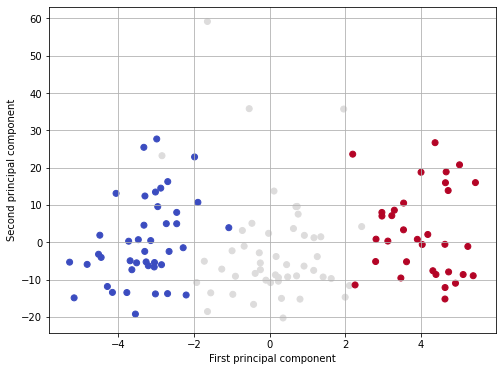

In [49]:
#21

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid()

In [66]:
#22-25

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_classifier_lda = LogisticRegression()
logistic_classifier_lda.fit(X_train_lda, y_train)

dt_classifier_lda = DecisionTreeClassifier()
dt_classifier_lda.fit(X_train_lda, y_train)

grid_classifier_lda = GridSearchCV(RandomForestClassifier(), param_combination, verbose=1)
dt_classifier_lda.fit(X_train_lda, y_train)

DecisionTreeClassifier()

In [52]:
logistic_predicted_lda = logistic_classifier_lda.predict(X_test_lda)

In [61]:
dt_predicted_lda = dt_classifier_lda.predict(X_test_lda)

In [69]:
grid_search.fit(X_train_lda, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   25.8s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20]},
             verbose=1)

In [70]:
grid_predicted_lda = grid_search.predict(X_test_lda)
grid_predicted_lda

array([2, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 1,
       1, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 3, 1, 2, 1, 1, 2, 3])

In [59]:
confusion_matrix(y_test, logistic_predicted_lda)

array([[17,  0,  0],
       [ 2, 20,  0],
       [ 0,  0, 15]])

In [62]:
confusion_matrix(y_test, dt_predicted_lda)

array([[17,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 15]])

In [71]:
confusion_matrix(y_test, grid_predicted_lda)

array([[17,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 15]])

In [54]:
print('Logistic Regression with LDA Result')
print('Acc: ', accuracy_score(y_test, logistic_predicted_lda))
print('F1-Score(micro): ', f1_score(y_test, logistic_predicted_lda, average='micro'))
print('Precision(micro): ', precision_score(y_test, logistic_predicted_lda, average='micro'))
print('Recall(micro): ', recall_score(y_test, logistic_predicted_lda, average='micro'))
print()
print('F1-Score(macro): ', f1_score(y_test, logistic_predicted_lda, average='macro'))
print('Precision(macro): ', precision_score(y_test, logistic_predicted_lda, average='macro'))
print('Recall(macro): ', recall_score(y_test, logistic_predicted_lda, average='macro'))

Logistic Regression with LDA Result
Acc:  0.9629629629629629
F1-Score(micro):  0.9629629629629629
Precision(micro):  0.9629629629629629
Recall(micro):  0.9629629629629629

F1-Score(macro):  0.9656084656084656
Precision(macro):  0.9649122807017544
Recall(macro):  0.9696969696969697


In [72]:
print('Decision Tree with LDA Result Result')
print('Acc: ', accuracy_score(y_test, dt_predicted_lda))
print('F1-Score(micro): ', f1_score(y_test, dt_predicted_lda, average='micro'))
print('Precision(micro): ', precision_score(y_test, dt_predicted_lda, average='micro'))
print('Recall(micro): ', recall_score(y_test, dt_predicted_lda, average='micro'))
print()
print('F1-Score(macro): ', f1_score(y_test, dt_predicted_lda, average='macro'))
print('Precision(macro): ', precision_score(y_test, dt_predicted_lda, average='macro'))
print('Recall(macro): ', recall_score(y_test, dt_predicted_lda, average='macro'))

Decision Tree with LDA Result Result
Acc:  0.9814814814814815
F1-Score(micro):  0.9814814814814815
Precision(micro):  0.9814814814814815
Recall(micro):  0.9814814814814815

F1-Score(macro):  0.9827242524916944
Precision(macro):  0.9814814814814815
Recall(macro):  0.9848484848484849


In [74]:
print('GridSearchCV with LDA Result')
print('Acc: ', accuracy_score(y_test, grid_predicted_lda))
print('F1-Score(micro): ', f1_score(y_test, grid_predicted_lda, average='micro'))
print('Precision(micro): ', precision_score(y_test, grid_predicted_lda, average='micro'))
print('Recall(micro): ', recall_score(y_test, grid_predicted_lda, average='micro'))
print()
print('F1-Score(macro): ', f1_score(y_test, grid_predicted_lda, average='macro'))
print('Precision(macro): ', precision_score(y_test, grid_predicted_lda, average='macro'))
print('Recall(macro): ', recall_score(y_test, grid_predicted_lda, average='macro'))

GridSearchCV with LDA Result
Acc:  0.9814814814814815
F1-Score(micro):  0.9814814814814815
Precision(micro):  0.9814814814814815
Recall(micro):  0.9814814814814815

F1-Score(macro):  0.9827242524916944
Precision(macro):  0.9814814814814815
Recall(macro):  0.9848484848484849


In [87]:
#26

import plotly.express as px

rows = ['Baseline Logistic Regression', 'Baseline Decision Tree', 'Baseline Random Forest','GridSearchCV', 'Logistic Regression with LDA', 'Decision Tree with LDA', 'GridSearchCV with LDA']
columns = ['Accuracy', 'F1 Score:Micro', 'F1 Score:Macro', 'Precision:Micro', 'Precision:Macro', 'Recall:Micro', 'Recall:Macro']
values = [['0.9444', '0.9444', '0.9444', '0.9444', '0.9444', '0.9444', '0.9444'],
          ['0.9444', '0.9444', '0.9444', '0.9444', '0.9444','0.9444', '0.9444'],
          [accuracy_score(y_test, rf_predicted), f1_score(y_test, rf_predicted, average='micro'), f1_score(y_test, rf_predicted, average='macro'), precision_score(y_test, rf_predicted, average='micro'), precision_score(y_test, rf_predicted, average='macro'), recall_score(y_test, rf_predicted, average='micro'), recall_score(y_test, rf_predicted, average='macro')],
          [accuracy_score(y_test, grid_predicted), f1_score(y_test, grid_predicted, average='micro'), f1_score(y_test, grid_predicted, average='macro'), precision_score(y_test, grid_predicted, average='micro'), precision_score(y_test, grid_predicted, average='macro'), recall_score(y_test, grid_predicted, average='micro'), recall_score(y_test, grid_predicted, average='macro')],
          [accuracy_score(y_test, logistic_predicted_lda), f1_score(y_test, logistic_predicted_lda, average='micro'), f1_score(y_test, logistic_predicted_lda, average='macro'), precision_score(y_test, logistic_predicted_lda, average='micro'), precision_score(y_test, logistic_predicted_lda, average='macro'), recall_score(y_test, logistic_predicted_lda, average='micro'), recall_score(y_test, logistic_predicted_lda, average='macro')],
          [accuracy_score(y_test, dt_predicted_lda), f1_score(y_test, dt_predicted_lda, average='micro'), f1_score(y_test, dt_predicted_lda, average='macro'), precision_score(y_test, dt_predicted_lda, average='micro'), precision_score(y_test, dt_predicted_lda, average='macro'), recall_score(y_test, dt_predicted_lda, average='micro'), recall_score(y_test, dt_predicted_lda, average='macro')],
          [accuracy_score(y_test, grid_predicted_lda), f1_score(y_test, grid_predicted_lda, average='micro'), f1_score(y_test, grid_predicted_lda, average='macro'), precision_score(y_test, grid_predicted_lda, average='micro'), precision_score(y_test, grid_predicted_lda, average='macro'), recall_score(y_test, grid_predicted_lda, average='micro'), recall_score(y_test, grid_predicted_lda, average='macro')]]

df_model_compare = pd.DataFrame(values, rows, columns)
df_model_compare

fig = px.bar(df_model_compare, x=df_model_compare.index, y='Accuracy', title='Accuracy Comparison')
fig.show()

In [88]:
#27

fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Micro', title='F1 Score:Micro Comparison')
fig.show()

In [89]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Macro', title='F1 Score:Macro Comparison')
fig.show()

In [90]:
#28

fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Micro', title='Precision Score:Micro Comparison')
fig.show()

In [91]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Macro', title='Precision Score:Macro Comparison')
fig.show()

In [92]:
#29

fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Micro', title='Recall Score:Micro Comparison')
fig.show()

In [93]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Macro', title='Recall Score:Macro Comparison')
fig.show()

In [94]:
#30

rows = ['Baseline Logistic Regression', 'Baseline Decision Tree', 'Baseline Random Forest']
columns = ['Accuracy', 'F1 Score:Micro', 'F1 Score:Macro', 'Precision:Micro', 'Precision:Macro', 'Recall:Micro', 'Recall:Macro']
values = [['0.9444', '0.9444', '0.9444', '0.9444', '0.9444', '0.9444', '0.9444'],
          ['0.9444', '0.9444', '0.9444', '0.9444', '0.9444','0.9444', '0.9444'],
          [accuracy_score(y_test, rf_predicted), f1_score(y_test, rf_predicted, average='micro'), f1_score(y_test, rf_predicted, average='macro'), precision_score(y_test, rf_predicted, average='micro'), precision_score(y_test, rf_predicted, average='macro'), recall_score(y_test, rf_predicted, average='micro'), recall_score(y_test, rf_predicted, average='macro')]]
df_model_compare = pd.DataFrame(values, rows, columns)
df_model_compare

fig = px.bar(df_model_compare, x=df_model_compare.index, y='Accuracy', title='Accuracy Comparison')
fig.show()

In [95]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Micro', title='F1 Score:Micro Comparison')
fig.show()

In [96]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Macro', title='F1 Score:Macro Comparison')
fig.show()

In [97]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Micro', title='Precision Score:Micro Comparison')
fig.show()

In [98]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Macro', title='Precision Score:Macro Comparison')
fig.show()

In [99]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Micro', title='Recall Score:Micro Comparison')
fig.show()

In [100]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Macro', title='Recall Score:Macro Comparison')
fig.show()

In [101]:
#31

rows = ['Logistic Regression with LDA', 'Decision Tree with LDA', 'GridSearchCV with LDA']
columns = ['Accuracy', 'F1 Score:Micro', 'F1 Score:Macro', 'Precision:Micro', 'Precision:Macro', 'Recall:Micro', 'Recall:Macro']
values = [[accuracy_score(y_test, logistic_predicted_lda), f1_score(y_test, logistic_predicted_lda, average='micro'), f1_score(y_test, logistic_predicted_lda, average='macro'), precision_score(y_test, logistic_predicted_lda, average='micro'), precision_score(y_test, logistic_predicted_lda, average='macro'), recall_score(y_test, logistic_predicted_lda, average='micro'), recall_score(y_test, logistic_predicted_lda, average='macro')],
          [accuracy_score(y_test, dt_predicted_lda), f1_score(y_test, dt_predicted_lda, average='micro'), f1_score(y_test, dt_predicted_lda, average='macro'), precision_score(y_test, dt_predicted_lda, average='micro'), precision_score(y_test, dt_predicted_lda, average='macro'), recall_score(y_test, dt_predicted_lda, average='micro'), recall_score(y_test, dt_predicted_lda, average='macro')],
          [accuracy_score(y_test, grid_predicted_lda), f1_score(y_test, grid_predicted_lda, average='micro'), f1_score(y_test, grid_predicted_lda, average='macro'), precision_score(y_test, grid_predicted_lda, average='micro'), precision_score(y_test, grid_predicted_lda, average='macro'), recall_score(y_test, grid_predicted_lda, average='micro'), recall_score(y_test, grid_predicted_lda, average='macro')]]

df_model_compare = pd.DataFrame(values, rows, columns)
df_model_compare

fig = px.bar(df_model_compare, x=df_model_compare.index, y='Accuracy', title='Accuracy Comparison')
fig.show()

In [102]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Micro', title='F1 Score:Micro Comparison')
fig.show()

In [103]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='F1 Score:Macro', title='F1 Score:Macro Comparison')
fig.show()

In [104]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Micro', title='Precision Score:Micro Comparison')
fig.show()

In [105]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Precision:Macro', title='Precision Score:Macro Comparison')
fig.show()

In [106]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Micro', title='Recall Score:Micro Comparison')
fig.show()

In [107]:
fig = px.bar(df_model_compare, x=df_model_compare.index, y='Recall:Macro', title='Recall Score:Macro Comparison')
fig.show()